# Assignment 2

## Dataset

In [42]:
import pandas as pd
import numpy as np
import math

column_names = ["xs", "ts"]
data = pd.read_csv('../assignment2/PCB.dt', delimiter='\t', header=None, names=column_names)
print(data.head(5))

   xs   ts
0   1  0.6
1   6  3.4
2   1  1.6
3   6  9.7
4   1  0.5


In [125]:
def test_model(m):
    m = m(1)
    m.train(data['xs'], data['ts'])
    loss = m.loss(data['xs'], data['ts'])
    r = r_squared(data['ts'], [m.predict(x) for x in data['xs']])
    return m, loss, r
    

## 1.1 Linear Regression

In [104]:
class LinearRegression:
    w = np.random.normal(loc=0, scale=0.3, size=2)
        
    def predict(self, x) -> float:
        x = np.append(x, 1)
        return self.w.T @ x
        
    def loss(self, xs, ys) -> float:
        error = [(t - self.predict(x))**2 for t, x in zip(ys, xs)]
        return np.sum(error) / len(ys)
        
    def train(self, xs, ys):
        x = np.array([np.append(x, 1) for x in xs])
        self.w = np.linalg.inv(x.T @ x) @ x.T @ ys
    
    def __str__(self):
        return "Linear Regression [" + str(list(self.w)) + "]"
        
    def params(self):
        return self.w

In [105]:
model = LinearRegression(1)
model.train(data['xs'], data['ts'])
loss_model = model.loss(data['xs'], data['ts'])
print("Loss after training of LinearRegression: ", loss_model)
print("Model: ", model)

Loss after training of LinearRegression:  24.801064316570578
Model:  Linear Regression [[1.5577705194394693, -1.4519439468970625]]


## 1.2 Exp(LinearRegression)

In [210]:
class NonLinearModel(LinearRegression):
    def predict(self, x) -> float:
        return math.exp(super().predict(x))
    
    def predict2(self, x) -> float:
        return super().predict(x)
    
    def loss2(self, xs, ys):
        error = [(t - super().predict(x))**2 for t, x in zip(ys, xs)]
        return np.sum(error) / len(ys)
    
    def train(self, xs, ys):
        super().train(xs, np.log(ys))
        
    def __str__(self):
        return "Non Linear Model [" + str(list(self.w)) + "]"

In [211]:
non_linear_model = NonLinearModel(1)
non_linear_model.train(data['xs'], data['ts'])
loss1_non_linear_model = non_linear_model.loss(data['xs'], data['ts'])
loss2_non_linear_model = non_linear_model.loss2(data['xs'], np.log(data['ts']))
print("loss after training of nonLinearModel: ", loss1_non_linear_model)
print("loss after training of nonLinearModel: ", loss2_non_linear_model)
print("Model: ", non_linear_model)

loss after training of nonLinearModel:  34.83556116722042
loss after training of nonLinearModel:  0.29853492489386185
Model:  Non Linear Model [[0.25912823956407166, 0.03147246971447559]]



## 1.3 Error Comparison

## 1.4 Plots

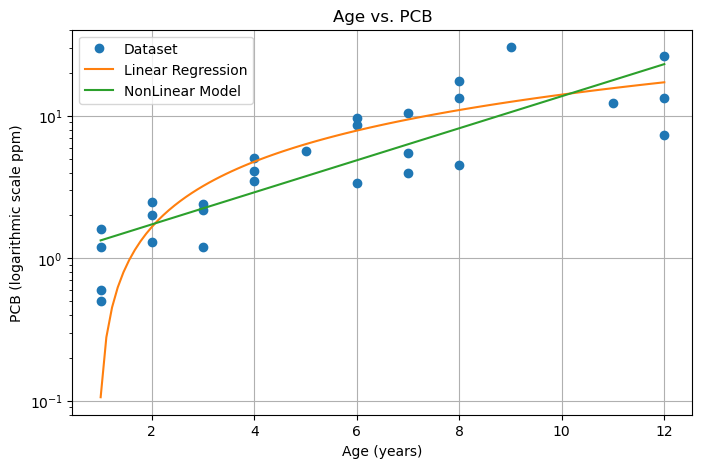

In [220]:
import matplotlib.pyplot as plt

x = np.linspace(np.min(data['xs']), np.max(data['xs']), 100)

y_linear = [model.predict(x) for x in x]
y_nonlinear = [non_linear_model.predict(x) for x in x]

fig, ax = plt.subplots(figsize=(8,5))
ax.semilogy(data['xs'], data['ts'], 'o', label='Dataset')
ax.semilogy(x, y_linear, '-', label='Linear Regression')
ax.semilogy(x, y_nonlinear, '-', label='NonLinear Model')
ax.grid(True)

ax.set_xlabel('Age (years)')
ax.set_ylabel('PCB (logarithmic scale ppm)')
ax.set_title('Age vs. PCB')
ax.legend()
plt.show()


## 1.5 Coefficient of determination

In [142]:
def r_squared(y_true, y_pred):
    num = np.sum([(y - p)**2 for p, y in zip(y_pred, y_true)])
    den = np.sum([(y - np.mean(y_true))**2 for y in y_true])
    return 1 - (num / den)

In [148]:
non_linear_r_squared = r_squared(data['ts'], [non_linear_model.predict(x) for x in data['xs']])
print(non_linear_r_squared)

0.35701357316098514


## 1.6 $ exp(a \cdot \sqrt x + b) $

In [149]:
class NonLinearModel2(NonLinearModel):
    def predict(self, x) -> float:
        return super().predict(np.sqrt(x))
    
    def train(self, xs, ys):
        super().train(np.sqrt(xs), ys)

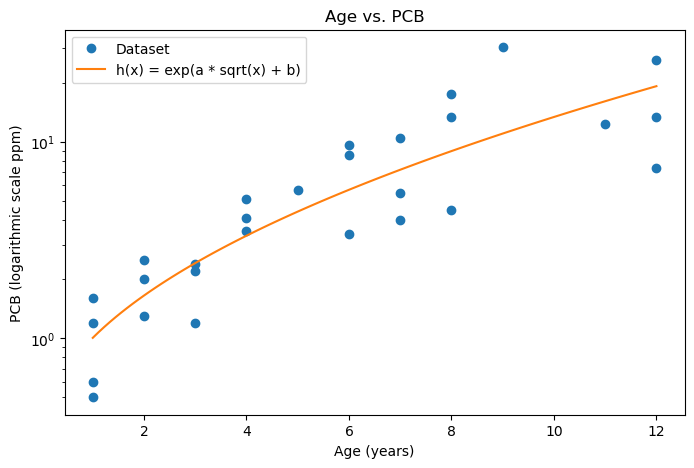

loss:  28.084390174944364
r_squared:  0.4816250669292411


In [153]:
r3 = test_model(NonLinearModel2)

x = np.linspace(np.min(data['xs']), np.max(data['xs']), 100)

y3 = [r3[0].predict(x) for x in x]

_, ax = plt.subplots(figsize=(8,5))
ax.semilogy(data['xs'], data['ts'], 'o', label='Dataset')
ax.semilogy(x, y3, '-', label='h(x) = exp(a * sqrt(x) + b)')

ax.set_xlabel('Age (years)')
ax.set_ylabel('PCB (logarithmic scale ppm)')
ax.set_title('Age vs. PCB')
ax.legend()
ax.grid(True)
plt.show()

r_squared_v2 = r_squared(data['ts'], [r3[0].predict(x) for x in data['xs']])
print("loss: ", r3[1])
print("r_squared: ", r_squared_v2)


# 3 Confidence Intervals

In [194]:
import math

def hoeffding_ci(n, mean, delta):
    delta = 1 - delta
    margin = math.sqrt(1 / 2 / n * math.log(2 / delta))
    return max(mean - margin, 0), min(mean + margin, 1)

In [196]:
s1 = pd.read_csv('../assignment2/s1.csv', header=None)
s = pd.read_csv('../assignment2/s.csv', header=None)

print(s.head(5))

     0
0  0.0
1  0.0
2  1.0
3  1.0
4  1.0


In [199]:
ci_95 = hoeffding_ci(len(s), np.mean(s), 0.95)
ci_98 = hoeffding_ci(len(s), np.mean(s), 0.98)

print(ci_98[0] - ci_95[0], ci_98[1] - ci_95[1])


-0.01013764603137779 0.01013764603137779
